In [95]:
import numpy as np
import pandas as pd
import pymorphy2 as pm2
import re
import nltk
nltk.download("stopwords")
#--------#
from nltk.corpus import stopwords

#Create lemmatizer and stopwords list
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valeria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
data = pd.read_csv('jaguar.csv')
pmm = pm2.MorphAnalyzer()

In [97]:
def parse(text):
    text = re.sub(r'[^\w\s]','',text)
    text = [pmm.normal_forms(x)[0] for x in text.split() if x not in russian_stopwords]
    return text

In [98]:
jaguar_corpus = data['body'].apply(parse)

In [99]:
jaguar_corpus

0     [ягуар, panthera, onca, вид, хищный, млекопита...
1     [на, вид, американский, зверь, вылить, леопард...
2     [ягуар, хищник, семейство, кошачий, принадлежа...
3     [название, название, ягуар, предположительно, ...
4     [ягуар, относиться, один, самый, крупный, живо...
5     [один, крупный, хищный, млекопитающее, семейст...
6     [в, влажный, тропический, леса, центральный, ю...
7     [ягуар, крупный, хищник, южный, америка, этот,...
8     [ягуар, млекопитающее, семейство, кошачий, сво...
9     [большой, грациозный, кошка, ягуар, обитать, и...
10    [jaguar, напиток, jaguar, слабоалкогольный, га...
11    [слабоалкогольный, напиток, ягуар, самый, попу...
12    [jaguar, популярный, мир, энергетический, напи...
13    [яга, это, легенда, как, свой, время, легенда,...
14    [напиток, ягуар, алкогольный, энергетик, напит...
15    [слабоалкогольный, энергетический, напиток, яг...
16    [напиток, ягуар, jaguar, начать, появляться, р...
17    [энергетический, алкогольный, напиток, пра

# Word embeddings

In [100]:
from gensim.models import Word2Vec

model = Word2Vec(jaguar_corpus, size=300, window=5, min_count=5, iter=10)
model.init_sims(replace = True)
model.save("jaguar.model")

# Docs embeddings

In [109]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full

In [102]:
list(jaguar_corpus)
jaguar_dict = Dictionary(jaguar_corpus)
#jaguar_dict.filter_extremes(no_below=20, no_above=0.2)
#jaguar_dict.compactify()

In [121]:
len(jaguar_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843


In [104]:
jaguar_bow = [jaguar_dict.doc2bow(entry) for entry in jaguar_corpus]
print(jaguar_bow)

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 5), (57, 3), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 5), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 4), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 3), (93, 1), (94, 3), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 8), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1)

In [105]:
model_tfidf = TfidfModel(jaguar_bow, id2word=jaguar_dict)
jaguar_tfidf  = model_tfidf[jaguar_bow]
jaguar_vecs = np.vstack([sparse2full(c, len(jaguar_dict)) for c in jaguar_tfidf])

In [131]:
tfidf_emb_vecs = np.vstack([i for i in jaguar_dict])

In [141]:
jaguar_emb = np.dot(jaguar_vecs, tfidf_emb_vecs)

In [151]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import  ward, dendrogram

dist = 1 - cosine_similarity(model[model.wv.vocab])
linkage_matrix = ward(dist)
dist

/home/valeria/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


array([[-3.5762787e-07,  2.2172928e-04,  3.8266182e-05, ...,
         4.8708916e-04,  1.8447638e-04,  2.3812056e-04],
       [ 2.2172928e-04, -2.3841858e-07,  2.4026632e-04, ...,
         7.1251392e-04,  4.0531158e-04,  4.3463707e-04],
       [ 3.8266182e-05,  2.4026632e-04,  0.0000000e+00, ...,
         4.7928095e-04,  2.0301342e-04,  2.4634600e-04],
       ...,
       [ 4.8708916e-04,  7.1251392e-04,  4.7928095e-04, ...,
         1.1920929e-07,  6.5922737e-04,  7.3200464e-04],
       [ 1.8447638e-04,  4.0531158e-04,  2.0301342e-04, ...,
         6.5922737e-04,  0.0000000e+00,  4.3761730e-04],
       [ 2.3812056e-04,  4.3463707e-04,  2.4634600e-04, ...,
         7.3200464e-04,  4.3761730e-04, -2.3841858e-07]], dtype=float32)

In [158]:
labels = [el for el in model.wv.vocab]

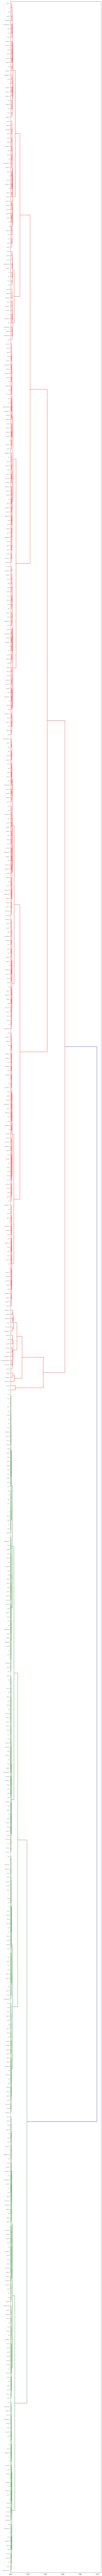

In [159]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 250)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=labels);

pyplot.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

pyplot.tight_layout() 

pyplot.savefig('w2v_clusters.png', dpi=200) #save figure as ward_clusters